In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


<h1> Importing Libraries </h1>

In [2]:
%pylab inline
 
import numpy as np
import pandas as pd
#from scipy.misc import imread
from sklearn.metrics import accuracy_score
from matplotlib import pyplot 
import tensorflow as tf
import keras
import csv
#TO stop potential randomness
seed=128
rng = np.random.RandomState(seed)

Populating the interactive namespace from numpy and matplotlib


In [3]:
from keras.utils.np_utils import to_categorical
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.preprocessing import image

**Uploading datasets for train and test **

In [4]:
train = pd.read_csv(r"/kaggle/input/digit-recognizer/train.csv",  engine="c")

In [5]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.pixel355.unique()

array([  0, 240, 227, 200, 239,  20,   6, 253, 252, 131,  29, 207,  45,
        12,  39, 254, 255,  41, 215,   4,  11, 204,  80, 245,  28, 187,
       251, 138,  79, 246,   7, 228, 248, 141,   8, 203, 218, 243,  31,
       236,  38,  53, 219,  19, 237,  57, 117, 128, 224, 221, 225, 152,
       106, 205,  68,  72,   2,  96, 216, 210, 133,  92, 100,  23,  94,
       119, 146, 229,  36, 147,  64, 209, 170, 213,  14, 217, 143, 250,
        47, 182, 198, 102, 158,  69,  81, 244,  48,  43, 154, 126, 107,
       242,  13,  30, 222, 231, 197,  84,  59, 122, 181, 241,  60, 176,
       191, 249, 129,  97,  85, 123, 161, 155,  71, 206, 235,  24, 156,
       232,  32,  15,  54, 125,  88, 190,  66, 201, 120, 134, 233,  44,
        26,  10, 118, 116, 211,   1, 196,  82, 175, 150, 220, 109, 166,
       115, 162,  67, 226,  93,  86, 145,  78, 164,  70, 148, 163,   5,
       186, 113, 127, 111, 168,  87, 171, 121,   9,  16, 144, 142, 160,
        50, 124,  74,  62, 194,  22, 223, 157, 195,  40,  21, 11

In [7]:
test = pd.read_csv(r"/kaggle/input/digit-recognizer/test.csv",  engine='c')

In [8]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Cleanising dataset !

**Droping the rows which has null value in any column**

In [9]:
test = test.dropna()
train = train.dropna()

In [10]:
trainX = (train.iloc[:,1:].values).astype('float32') 
trainY = train.iloc[:,0].values.astype('int32') 
testX = (test.values).astype('float32')
#y_test = (test.iloc[:,0].values).astype('int32')

**Reshaping it because we need to train our image. We can also pass Flatten input but it may miss the important data at the edges**

In [11]:
trainX = trainX.reshape(trainX.shape[0], 28, 28,1)
trainX.shape

(42000, 28, 28, 1)

In [12]:
testX = testX.reshape(testX.shape[0], 28, 28,1)
testX.shape

(28000, 28, 28, 1)

# One hot Encoding

As the target labels contain 10 different values . So to access each of them its better to make a separate column for them

In [13]:
trainY=to_categorical(trainY,num_classes = 10)

# Normalisation

As the pixel value contains from 0 - 255 . So,we need to normalise it between -0.1 to 1.175.

In [14]:
mean_px =trainX.mean().astype(np.float32)
std_px = trainX.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px
#def standardize(x): 
   # return (x)/255.0

In [15]:
trainY

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Spliting datasets into validation and training

In [16]:
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.10, random_state=42)

In [17]:
print("train X shape: ", trainX.shape)
print("train Y shape: ", trainY.shape)
print("validation X shape: ", valX.shape)
print("validation y shape: ", valY.shape)

train X shape:  (37800, 28, 28, 1)
train Y shape:  (37800, 10)
validation X shape:  (4200, 28, 28, 1)
validation y shape:  (4200, 10)


In [18]:
gen = image.ImageDataGenerator()
batches = gen.flow(trainX,trainY, batch_size=64)
val_batches=gen.flow(valX, valY, batch_size=64)

<h1>Describing Variables for our model </h1>

In [19]:
input_num_units = 784
hidden1_num_units =500
hidden2_num_units = 500
hidden3_num_units =500
#hidden4_num_units = 500
hidden5_num_units =500
output_num_units = 10

epochs =10
batch_size = 128

# Model (Naive)

In [20]:
model = Sequential([Lambda(standardize,input_shape=(28,28,1)),
                    Flatten(),
                    Dense(units=hidden1_num_units,input_dim = input_num_units, activation = 'relu'),
                   Dense(units=hidden2_num_units,input_dim = hidden1_num_units, activation = 'relu'),
                   Dense(units=hidden3_num_units,input_dim = hidden2_num_units, activation = 'relu'),
                   Dense(units=hidden5_num_units,input_dim = hidden3_num_units, activation = 'relu'),
                   Dense(units=output_num_units,input_dim = hidden5_num_units, activation = 'softmax')])


In [21]:
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [22]:
adam =  keras.optimizers.Adam(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

In [23]:
trained_model = model.fit_generator(generator=batches, epochs= epochs,validation_data=val_batches,)

Epoch 1/10
591/591 [==============================] - 6s 11ms/step - loss: 0.5660 - accuracy: 0.8669 - val_loss: 0.2888 - val_accuracy: 0.9188
Epoch 2/10
591/591 [==============================] - 6s 10ms/step - loss: 0.3227 - accuracy: 0.9195 - val_loss: 0.3149 - val_accuracy: 0.9217
Epoch 3/10
591/591 [==============================] - 6s 10ms/step - loss: 0.2730 - accuracy: 0.9311 - val_loss: 0.3655 - val_accuracy: 0.9221
Epoch 4/10
591/591 [==============================] - 6s 10ms/step - loss: 0.2855 - accuracy: 0.9296 - val_loss: 0.2597 - val_accuracy: 0.9340
Epoch 5/10
591/591 [==============================] - 6s 10ms/step - loss: 0.2309 - accuracy: 0.9415 - val_loss: 0.2324 - val_accuracy: 0.9357
Epoch 6/10
591/591 [==============================] - 6s 10ms/step - loss: 0.2075 - accuracy: 0.9486 - val_loss: 0.2856 - val_accuracy: 0.9357
Epoch 7/10
591/591 [==============================] - 6s 10ms/step - loss: 0.2477 - accuracy: 0.9395 - val_loss: 0.4250 - val_accuracy: 0.9040

In [24]:
history_dict = trained_model.history
history_dict.keys() 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Visualisation through Graphs

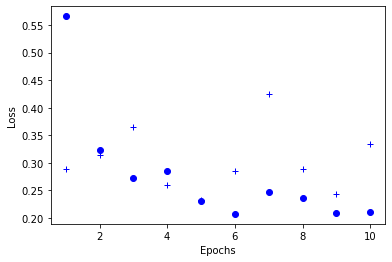

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

Text(0, 0.5, 'Accuracy')

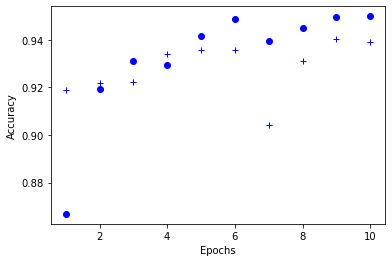

In [26]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


# Model (LeNET modified)

The model is just like LeNET but instead of average , we use maxpooling.

In [27]:
def get_LeNET_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(6,(5,5), activation='relu'),
        MaxPooling2D(),
        Convolution2D(16,(5,5), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(120, activation='relu'),
        Dense(84, activation='relu'),
        Dense(10, activation='softmax')
        ])
    
    adam =  keras.optimizers.Adam(lr=0.01)
    model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
    return model


In [28]:
model= get_LeNET_model()


In [29]:
history=model.fit_generator(generator=batches,  epochs=10, 
                    validation_data=val_batches)

Epoch 1/10
591/591 [==============================] - 9s 15ms/step - loss: 0.2101 - accuracy: 0.9349 - val_loss: 0.1111 - val_accuracy: 0.9660
Epoch 2/10
591/591 [==============================] - 8s 14ms/step - loss: 0.1132 - accuracy: 0.9684 - val_loss: 0.1430 - val_accuracy: 0.9636
Epoch 3/10
591/591 [==============================] - 8s 14ms/step - loss: 0.1011 - accuracy: 0.9715 - val_loss: 0.0933 - val_accuracy: 0.9738
Epoch 4/10
591/591 [==============================] - 9s 15ms/step - loss: 0.0961 - accuracy: 0.9753 - val_loss: 0.1522 - val_accuracy: 0.9633
Epoch 5/10
591/591 [==============================] - 9s 15ms/step - loss: 0.1117 - accuracy: 0.9718 - val_loss: 0.1347 - val_accuracy: 0.9674
Epoch 6/10
591/591 [==============================] - 9s 15ms/step - loss: 0.0881 - accuracy: 0.9772 - val_loss: 0.1035 - val_accuracy: 0.9764
Epoch 7/10
591/591 [==============================] - 9s 15ms/step - loss: 0.0753 - accuracy: 0.9816 - val_loss: 0.1132 - val_accuracy: 0.9712

# Data Augumentation

<p>It is tehnique of showing slighly different or new images to neural network to avoid overfitting. And to achieve better generalization. In case you have very small dataset, you can use different kinds of data augmentation techniques to increase your data size. Neural networks perform better if you provide them more data.</p><br>

Different data aumentation techniques are as follows:<br>

Cropping<br>
Rotating<br>
Scaling<br>
Translating<br>
Flipping<br>
Adding Gaussian noise to input images etc.

In [30]:
gen =image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(trainX, trainY, batch_size=64)
val_batches = gen.flow(valX, valY, batch_size=64)

In [31]:
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches,  epochs=10, 
                    validation_data=val_batches, )

Epoch 1/10
591/591 [==============================] - 16s 28ms/step - loss: 0.2478 - accuracy: 0.9397 - val_loss: 0.2667 - val_accuracy: 0.9324
Epoch 2/10
591/591 [==============================] - 17s 28ms/step - loss: 0.1755 - accuracy: 0.9575 - val_loss: 0.1767 - val_accuracy: 0.9524
Epoch 3/10
591/591 [==============================] - 16s 27ms/step - loss: 0.1676 - accuracy: 0.9593 - val_loss: 0.1580 - val_accuracy: 0.9636
Epoch 4/10
591/591 [==============================] - 16s 28ms/step - loss: 0.1492 - accuracy: 0.9633 - val_loss: 0.2035 - val_accuracy: 0.9517
Epoch 5/10
591/591 [==============================] - 16s 27ms/step - loss: 0.1544 - accuracy: 0.9636 - val_loss: 0.2094 - val_accuracy: 0.9500
Epoch 6/10
591/591 [==============================] - 16s 27ms/step - loss: 0.1391 - accuracy: 0.9661 - val_loss: 0.1922 - val_accuracy: 0.9595
Epoch 7/10
591/591 [==============================] - 16s 27ms/step - loss: 0.1344 - accuracy: 0.9684 - val_loss: 0.1317 - val_accuracy:

In [32]:
model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(trainX, trainY, batch_size=64)
history=model.fit_generator(generator=batches , epochs=5)

Epoch 1/5
591/591 [==============================] - 8s 14ms/step - loss: 0.0752 - accuracy: 0.9836
Epoch 2/5
591/591 [==============================] - 8s 14ms/step - loss: 0.0703 - accuracy: 0.9851
Epoch 3/5
591/591 [==============================] - 8s 14ms/step - loss: 0.0636 - accuracy: 0.9858
Epoch 4/5
591/591 [==============================] - 8s 14ms/step - loss: 0.0819 - accuracy: 0.9837
Epoch 5/5
591/591 [==============================] - 8s 13ms/step - loss: 0.0836 - accuracy: 0.9832


# Submitting Predictions

In [33]:
predictions = model.predict_classes(testX, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("WOr.csv", index=False, header=True)

# If this notebook helps you then Please upvote it.